In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
#-------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
#---------------------------------------------------------------
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

load data

In [5]:
heart_data = pd.read_csv("D:\Data\heart.csv")

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
heart_data.shape

(303, 14)

In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Statical measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# checking the distribution of Target Variable
print(heart_data['target'].value_counts())
print()
print('1---->Defective heart')
print('0---->Healthy Heart')

target
1    165
0    138
Name: count, dtype: int64

1---->Defective heart
0---->Healthy Heart


In [15]:
X = heart_data.drop(columns=['target'])
Y = heart_data['target']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [20]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2


In [21]:
y_train

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: int64

In [23]:
print(X.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


Support Vector Machine (SVM)

In [26]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

Model evaluation

Accuracy Score

In [29]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)
training_data_accuracy = accuracy_score(y_train,train_prediction)
training_formatted_accuracy = "{:.2%}".format(training_data_accuracy)
print(f'Accuracy score of the training data: {training_formatted_accuracy}')
testing_data_accuracy = accuracy_score(y_test,test_prediction)
testing_formatted_accuracy = "{:.2%}".format(testing_data_accuracy)
print(f'Accuracy score of the testing data: {testing_formatted_accuracy}')

Accuracy score of the training data: 85.54%
Accuracy score of the testing data: 81.97%


confusion matrix

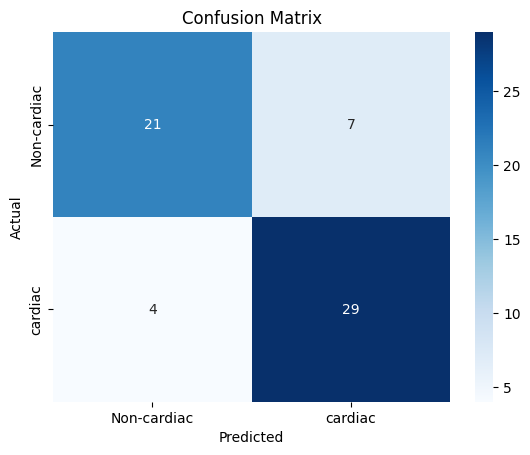

In [30]:
cm = confusion_matrix(y_test, test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-cardiac', 'cardiac'], 
            yticklabels=['Non-cardiac', 'cardiac'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [32]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Logistic Regression

In [34]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [35]:
# accuracy on training data
X_train_prediction = model2.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 85.12%


In [36]:
# accuracy on test data
X_test_prediction = model2.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)
print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 81.97%


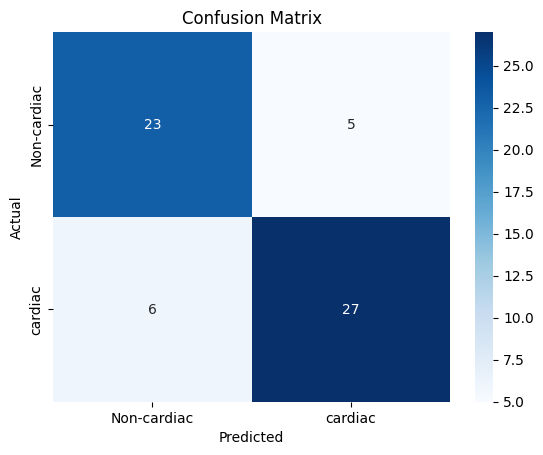

In [37]:
# Confusion matrix
cm = confusion_matrix(y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-cardiac', 'cardiac'], 
            yticklabels=['Non-cardiac', 'cardiac'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report

In [38]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [39]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Gradient Boosting

In [40]:
model3 = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, max_features=None)

In [41]:
model3.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=200)

Accuracy Score

In [42]:
# accuracy score on training data
X_train_prediction = model3.predict(x_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)
print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 100.00%


In [43]:
# accuracy score on testing data
X_test_prediction = model3.predict(x_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)
print(f'Accuracy score of test data: {formatted_accuracy}')

Accuracy score of test data: 68.85%


Confusion matrix

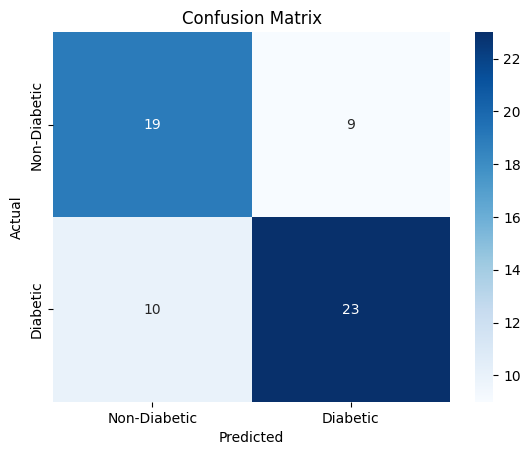

In [44]:
cm = confusion_matrix(y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [46]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.72      0.70      0.71        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [48]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Saving the trained model

In [49]:
import pickle

In [50]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [51]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [52]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
